In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error

from zhutils.correlation import dropna_pearsonr
from zhutils.normalization import get_normalized_list
from zhutils.tracheids import Tracheids
from zhutils.plots.colors import interpotate_between_colors

In [3]:

tr = Tracheids('Pereval', '../../data/processed/tracheids/pereval.csv', [])

In [6]:
_df = tr.data[(tr.data['Year']==1653) & (tr.data['Tree']=='PiSi_01')]

In [8]:
plt.rcParams['font.size'] = '26'
plt.rcParams['font.family'] = 'Times New Roman'

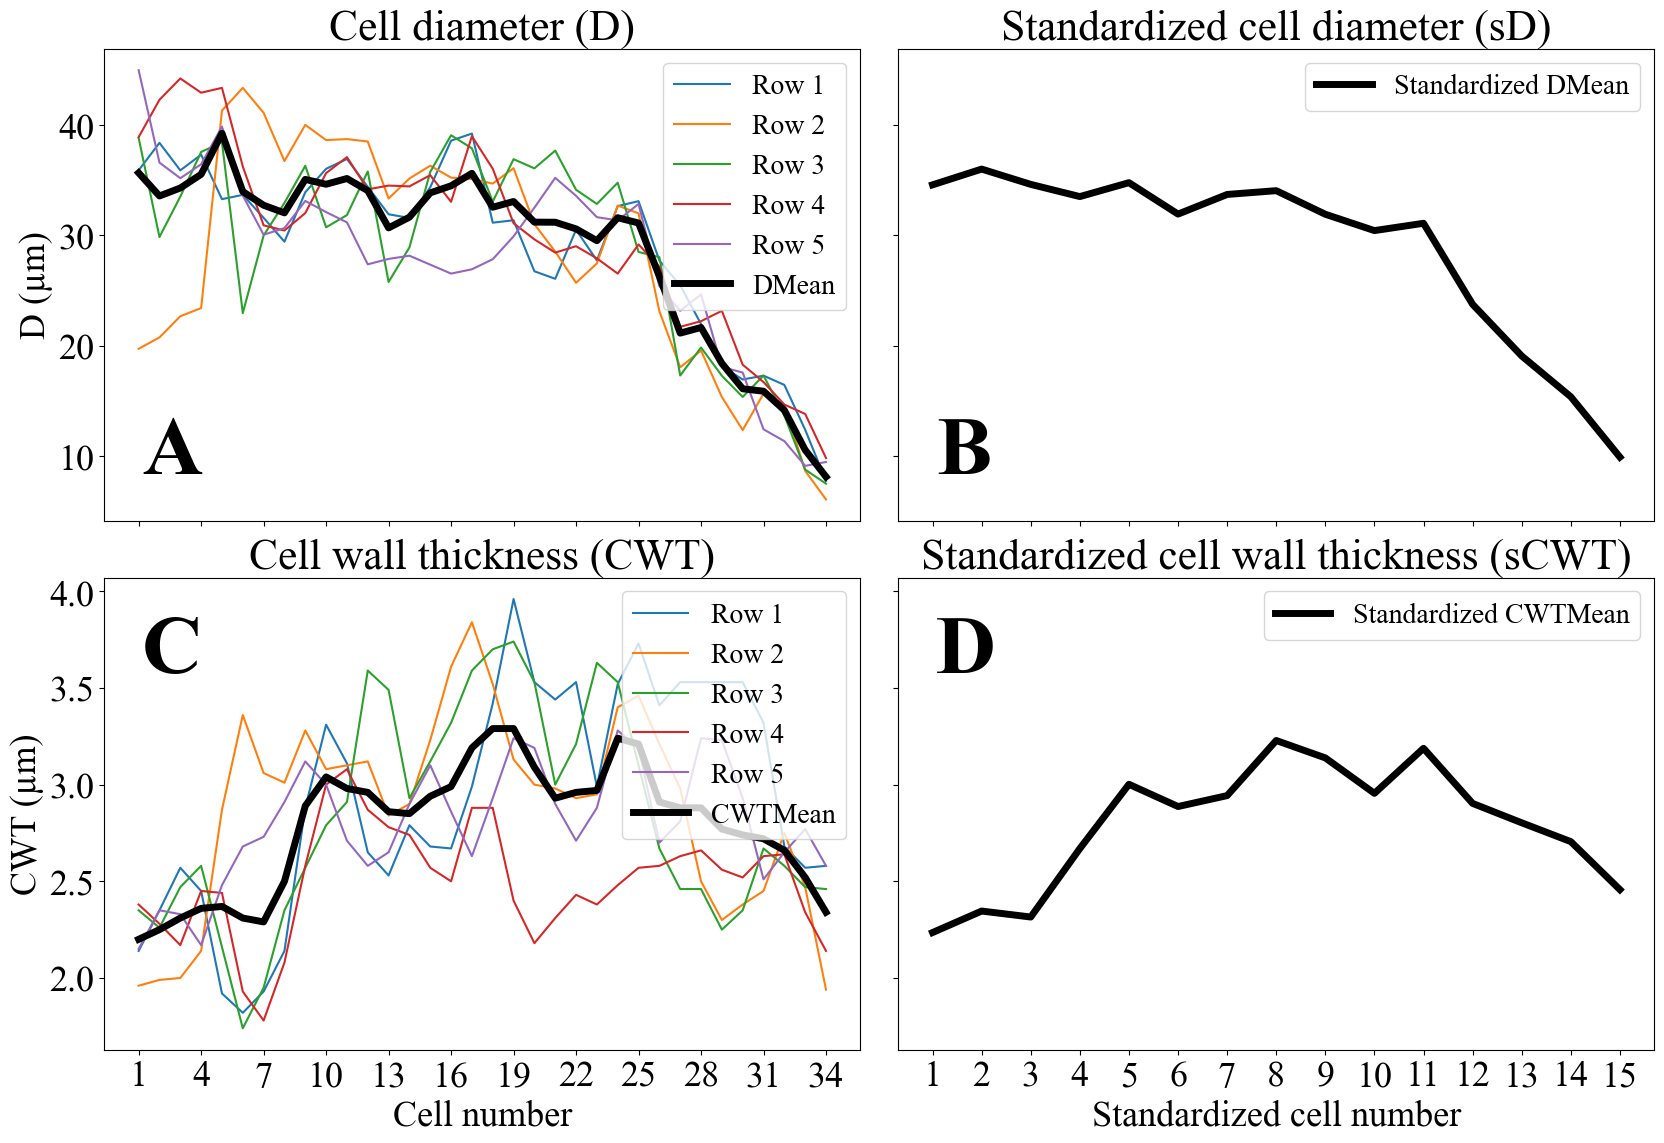

In [10]:
fig, ax = plt.subplots(2,2, figsize=(20, 13), sharex='col', sharey='row')
plt.subplots_adjust(hspace=0.12, wspace=.05)
X = range(1, len(_df)+1)
for i in range(1, 6):
    ax[0,0].plot(X, _df[f'D{i}'], label='Row '+str(i))
    #ax[0,0].annotate(str(i), xy=(X[0], list(_df[f'D{i}'])[0]))
ax[0,0].plot(X,_df[f'Dmean'], lw=5, c='k', label='DMean')

ax[0,0].set_ylabel('D (µm)')
ax[0,0].set_title('Cell diameter (D)')
"""ax[0].yaxis.tick_right()
ax[0].yaxis.set_ticks_position('right')
ax[0].yaxis.set_label_position("right")"""
for i in range(1, 6):
    ax[1,0].plot(X, _df[f'CWT{i}'], label='Row '+str(i))
    #ax[1,0].annotate(str(i), xy=(X[0], list(_df[f'CWT{i}'])[0]), bbox=dict(boxstyle="round", fc="0.8"),)
ax[1,0].plot(X,_df[f'CWTmean'], lw=5, c='k', label='CWTMean')

ax[1,0].set_title('Cell wall thickness (CWT)')
ax[1,0].set_ylabel('CWT (µm)')
ax[1,0].set_xlabel('Cell number')

ax[0,1].plot(range(1,16), get_normalized_list(_df[f'Dmean'], 15), lw=5, c='k', label='Standardized DMean')
ax[1,1].plot(range(1,16), get_normalized_list(_df[f'CWTmean'], 15), lw=5, c='k', label='Standardized CWTMean')
ax[1,0].set_xticks(range(1,len(_df)+1,3))
ax[1,1].set_xticks(range(1,16))
ax[0,1].set_title('Standardized cell diameter (sD)')
ax[1,1].set_title('Standardized cell wall thickness (sCWT)')
ax[1,1].set_xlabel('Standardized cell number')
ax[0,0].legend( fontsize="20", loc=1)
ax[1,0].legend(fontsize="20", loc=1)
ax[0,1].legend( fontsize="20", loc=1)
ax[1,1].legend(fontsize="20", loc=1)
ax[0,0].text(.05, .1,'A',  transform=ax[0,0].transAxes, fontsize="60", weight="bold")
ax[0,1].text(.05, .1,'B',  transform=ax[0,1].transAxes, fontsize="60", weight="bold")
ax[1,0].text(.05, .8,'C',  transform=ax[1,0].transAxes, fontsize="60", weight="bold")
ax[1,1].text(.05, .8,'D',  transform=ax[1,1].transAxes, fontsize="60", weight="bold")
"""ax[1].yaxis.tick_right()
ax[1].yaxis.set_ticks_position('right')
ax[1].yaxis.set_label_position("right")"""
plt.show()

In [11]:
norm_df = tr.normalize(15)

In [12]:
norm_df = norm_df.replace(
    ['3PiSi13a', 'PISI04', 'PISI10', 'PISI10a', 'PISI14a', 'PISI17b', 'PiSi_01'],
    ['Tree №5', 'Tree №2', 'Tree №3', 'Tree №4', 'Tree №6', 'Tree №7', 'Tree №1', ]
)

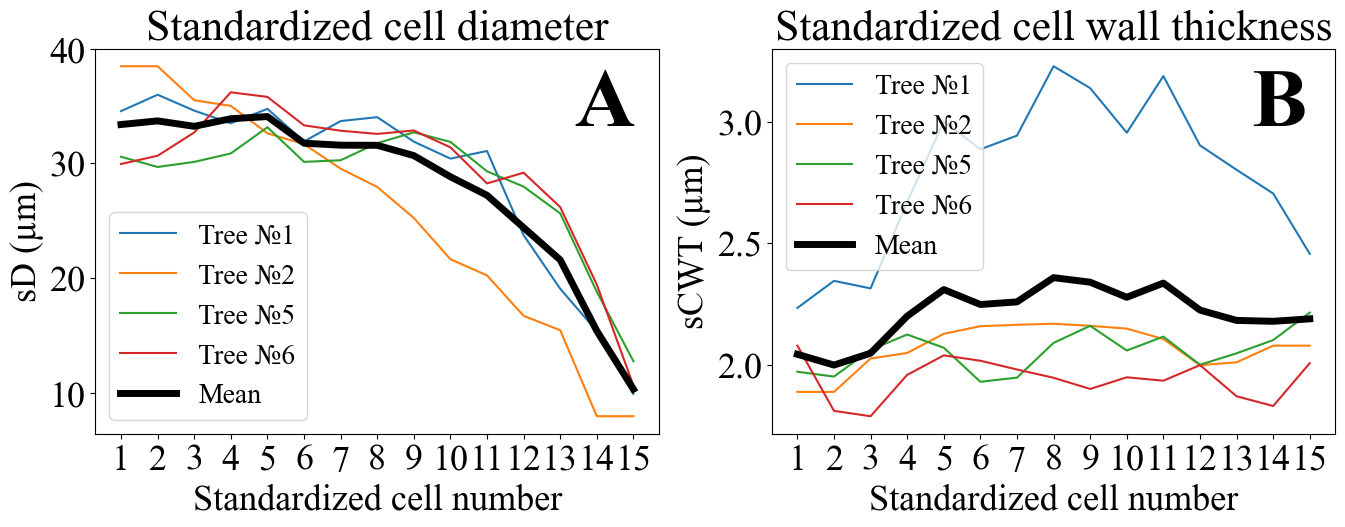

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharex=True)
plt.subplots_adjust(hspace=0.05)
X = range(1, 16)

norm_1653 = norm_df[norm_df['Year']==1653] 
diams = []
cwts = []
for tree in sorted(set(norm_1653['Tree'])):
    _df_ = norm_1653[norm_1653['Tree']==tree]
    diams.append(list(_df_[f'Dmean']))
    cwts.append(list(_df_[f'CWTmean']))
    ax[0].plot(X, _df_[f'Dmean'], label=tree)
    ax[1].plot(X, _df_[f'CWTmean'], label=tree)

ax[0].plot(X, np.array(diams).mean(axis=0), lw=5, c='k', label='Mean')
ax[0].legend(fontsize='20')

ax[0].set_xticks(range(1,16))
ax[1].plot(X, np.array(cwts).mean(axis=0), lw=5, c='k', label='Mean')
ax[1].legend(fontsize='20')
ax[0].set_ylabel('sD (µm)')
ax[1].set_ylabel('sCWT (µm)')
ax[1].set_xlabel('Standardized cell number')
ax[0].set_xlabel('Standardized cell number')
ax[0].set_title('Standardized cell diameter')
ax[1].set_title('Standardized cell wall thickness')
ax[0].set_title('Standardized cell diameter')
ax[1].set_title('Standardized cell wall thickness')
ax[0].text(.85, .8,'A',  transform=ax[0].transAxes, fontsize="60", weight="bold")
ax[1].text(.85, .8,'B',  transform=ax[1].transAxes, fontsize="60", weight="bold")
plt.show()

In [15]:
from src.features.feature_loader import FeatureLoader

#fl_10 = FeatureLoader('Pereval', '../../data/processed/tracheids/pereval.csv', normalize_to=10)
fl_15 = FeatureLoader('Pereval', '../../data/processed/tracheids/pereval.csv', normalize_to=15)

Text(0.4, 0.5, '.  .  .')

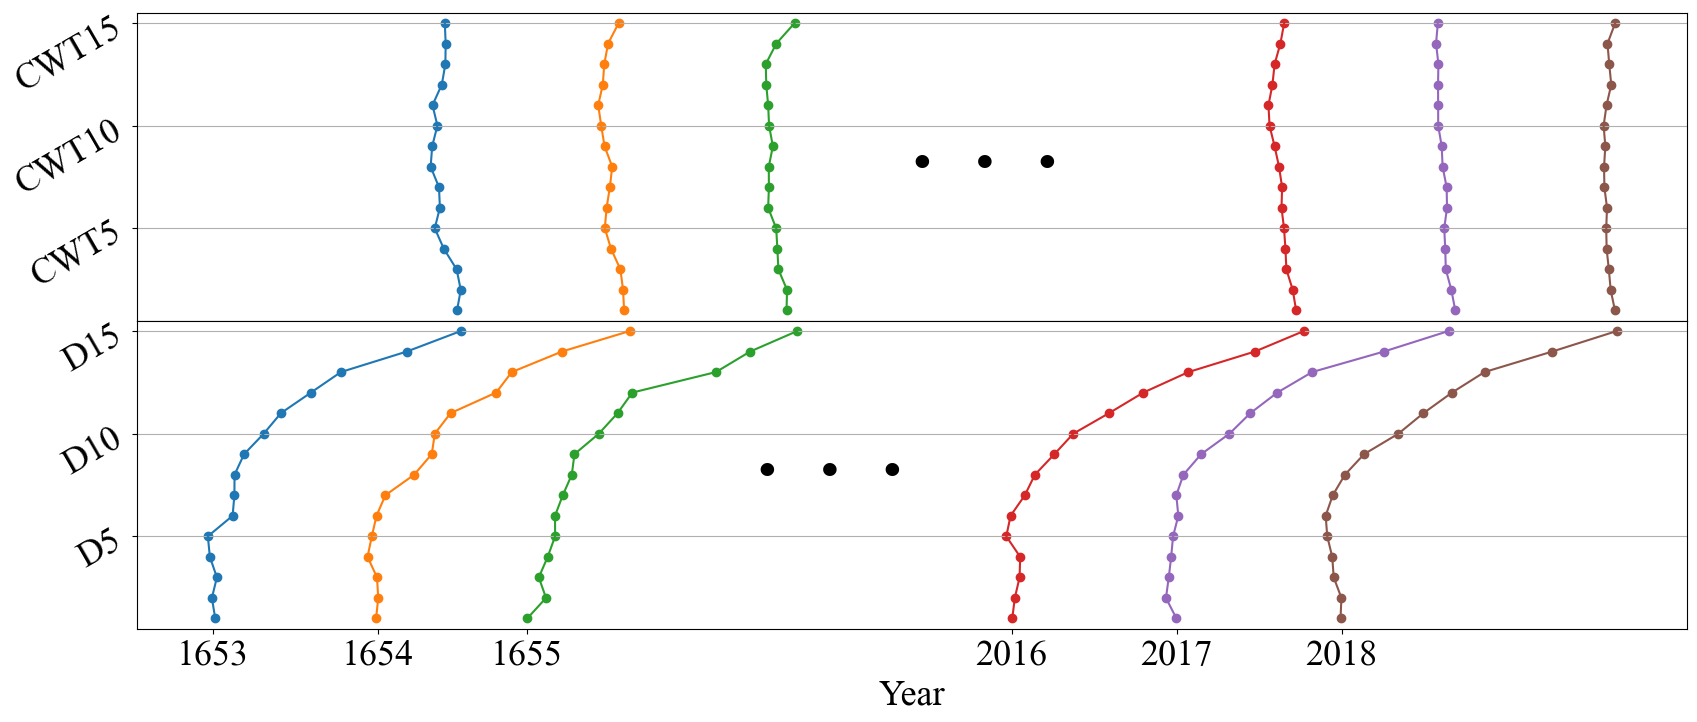

In [19]:


fig, ax = plt.subplots(2, figsize=(20, 8))
plt.subplots_adjust(hspace=0)
fl_df = fl_15.features.T

for i, year in enumerate([1653, 1654, 1655, 2016, 2017, 2018]):
    x = list(fl_df[year])
    d = 1 if i > 2 else 0
        
    ax[1].plot(max(x[:15]) - np.array(x[:15]) + 15*(i+1) + d*30, range(1, 16))
    ax[0].plot(max(x[15:]) - np.array(x[15:]) + 2*(i+1) + d*4, range(1, 16))
    ax[1].scatter(max(x[:15]) - np.array(x[:15]) + 15*(i+1) + d*30, range(1, 16))
    ax[0].scatter(max(x[15:]) - np.array(x[15:]) + 2*(i+1) + d*4, range(1, 16))
ax[0].grid(axis='y')
ax[1].grid(axis='y')
ax[0].set_ylim([0.5,15.5])
ax[1].set_ylim([0.5,15.5])
ax[0].set_xlim([-1.5,17])
ax[0].set_yticks([5,10,15])
ax[1].set_yticks([5,10,15])
ax[1].set_xticks([15.5, 31, 45, 90.5, 106, 121.5])
ax[1].set_xticklabels([1653, 1654, 1655, 2016, 2017, 2018])
ax[0].set_yticklabels(['CWT5','CWT10','CWT15'], rotation = 30)
ax[1].set_yticklabels(['D5','D10','D15'], rotation = 30)
ax[1].set_xlabel('Year')
#ax[0].set_ylabel('Dimension name'+' '*38)
ax[0].text(.5, .5,'.  .  .',  transform=ax[0].transAxes, fontsize="60", weight="bold")
ax[1].text(.4, .5,'.  .  .',  transform=ax[1].transAxes, fontsize="60", weight="bold")

Text(0.01, 0.8, 'B')

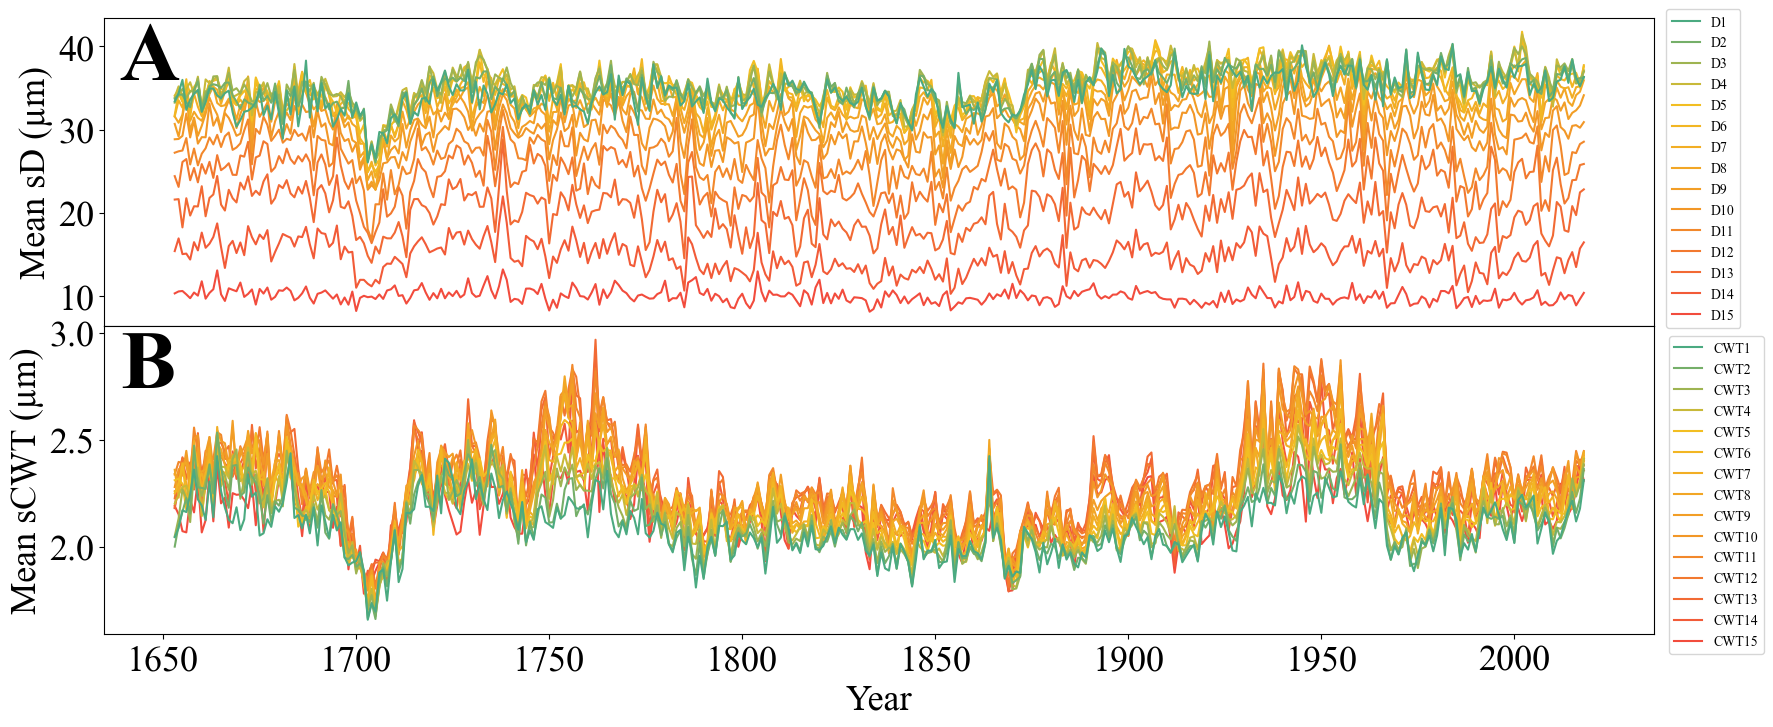

In [17]:
fig, ax = plt.subplots(2, figsize=(20, 8))
plt.subplots_adjust(hspace=0)
fl_df = fl_15.features
colors = interpotate_between_colors(['#22A699', '#F2BE22', '#F29727', '#F24C3D'], 15)
for i in range(15, 0, -1):
    ax[0].plot(fl_df[f'D{i}'], label=f'D{i}', color=colors[i-1])
    ax[1].plot(fl_df[f'CWT{i}'], label=f'CWT{i}', color=colors[i-1])
ax[0].set_ylabel('Mean sD (µm)')
ax[1].set_ylabel('Mean sCWT (µm)')
ax[1].set_xlabel('Year')


handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], fontsize='10',bbox_to_anchor=(1.06, 1.05))

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1], fontsize='10',bbox_to_anchor=(1.075, .99))

ax[0].text(.01, .8,'A',  transform=ax[0].transAxes, fontsize="60", weight="bold")
ax[1].text(.01, .8,'B',  transform=ax[1].transAxes, fontsize="60", weight="bold")

Text(0.01, 0.8, 'B')

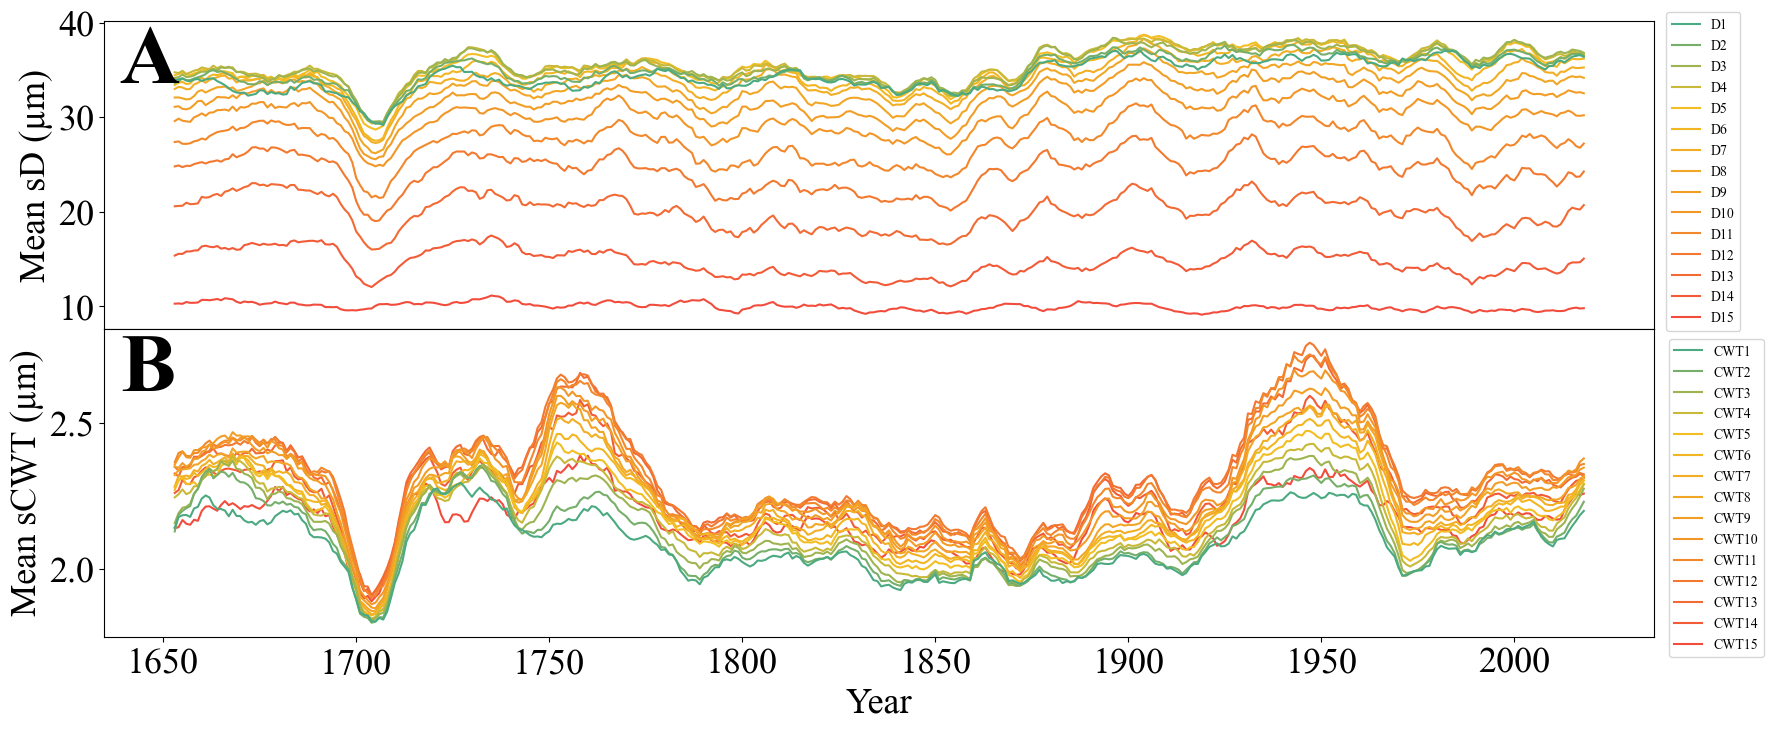

In [18]:
fig, ax = plt.subplots(2, figsize=(20, 8))
plt.subplots_adjust(hspace=0)
fl_df = fl_15.features
colors = interpotate_between_colors(['#22A699', '#F2BE22', '#F29727', '#F24C3D'], 15)
for i in range(15, 0, -1):
    ax[0].plot(fl_df[f'D{i}'].rolling(9,1,True).mean(), label=f'D{i}', color=colors[i-1])
    ax[1].plot(fl_df[f'CWT{i}'].rolling(9,1,True).mean(), label=f'CWT{i}', color=colors[i-1])
ax[0].set_ylabel('Mean sD (µm)')
ax[1].set_ylabel('Mean sCWT (µm)')
ax[1].set_xlabel('Year')

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], fontsize='10',bbox_to_anchor=(1.06, 1.05))

handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1], fontsize='10',bbox_to_anchor=(1.075, .99))

ax[0].text(.01, .8,'A',  transform=ax[0].transAxes, fontsize="60", weight="bold")
ax[1].text(.01, .8,'B',  transform=ax[1].transAxes, fontsize="60", weight="bold")

In [19]:
pca_15 = fl_15.get_pca_features(5, window=9)

In [36]:
undertexts = [u'\u2081', u'\u2082', u'\u2083', u'\u2084', u'\u2085']

Text(0.5, 0, 'Year')

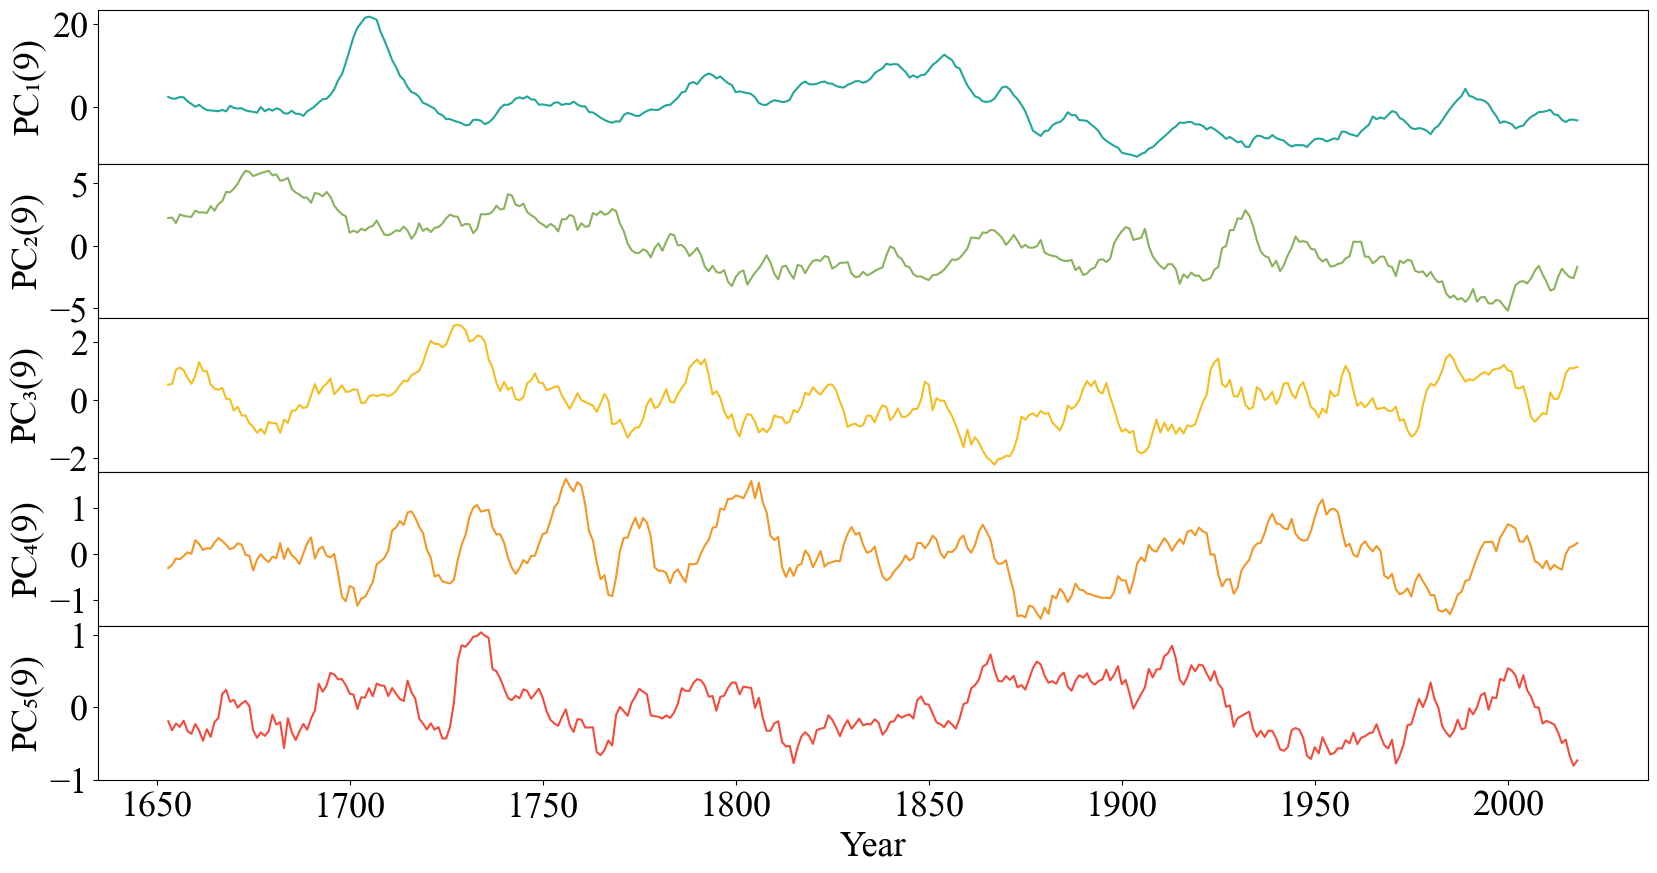

In [38]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=5)
plt.subplots_adjust(hspace=0)
fl_df = fl_15.features
colors = ['#22A699', '#8ab25d', '#F2BE22', '#F29727', '#F24C3D']
for i in range(1, 6,):
    ax[i-1].plot(pca_15[f'PCA{i}'], label=f'PC{i}', color=colors[i-1])
    ax[i-1].set_ylabel(f"PC{undertexts[i-1]}(9)")
ax[2].set_yticks([-2,0, 2])
ax[3].set_yticks([-1,0, 1])
ax[4].set_yticks([-1,0, 1])
ax[4].set_xlabel('Year')

In [73]:
from src.data.climate_loader import ClimateLoader

cl = ClimateLoader(
    '../../data/processed/climate/climate_tashtyp.csv',
    '../../data/processed/climate/reanalysis_tashtyp.csv'
)

In [77]:
climate = cl.get_climate(day_window=1, year_window=1)

In [117]:
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter

In [148]:
climate = cl.climate.set_index(['Year','Month','Day']).loc[1929]

[Text(0, 0.5, 'Temperature (℃)'), Text(0.5, 1.0, '1929'), (0, 365)]

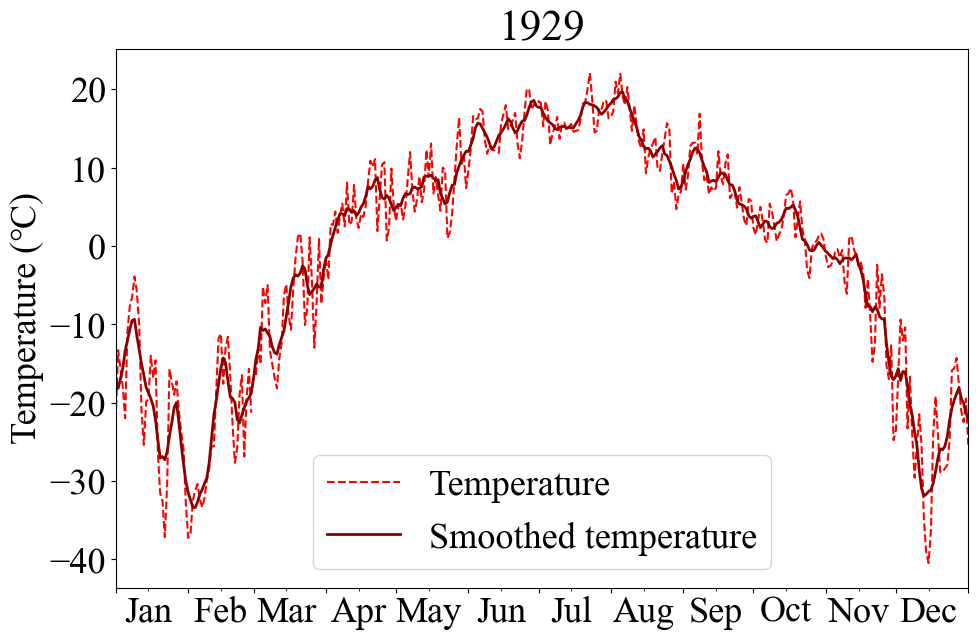

In [156]:
fig, ax = plt.subplots(figsize=(11, 7))

ax.plot(climate['Temperature'].values, c='red', linestyle='--', label='Temperature')
ax.plot(climate['Temperature'].rolling(7,1,True).mean().values, c='darkred', lw='2', label='Smoothed temperature')
ax.legend()

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.set(ylabel='Temperature (℃)', title = '1929', xlim=[0,365])

In [157]:
climate = cl.get_climate(day_window=7, year_window=1)

In [ ]:
cl.get_climate(day_window=7, year_window=9)[[(5,4), (6,4), (7,4)]]

[Text(0, 0.5, 'Temperature (℃)'), Text(0.5, 0, 'Year')]

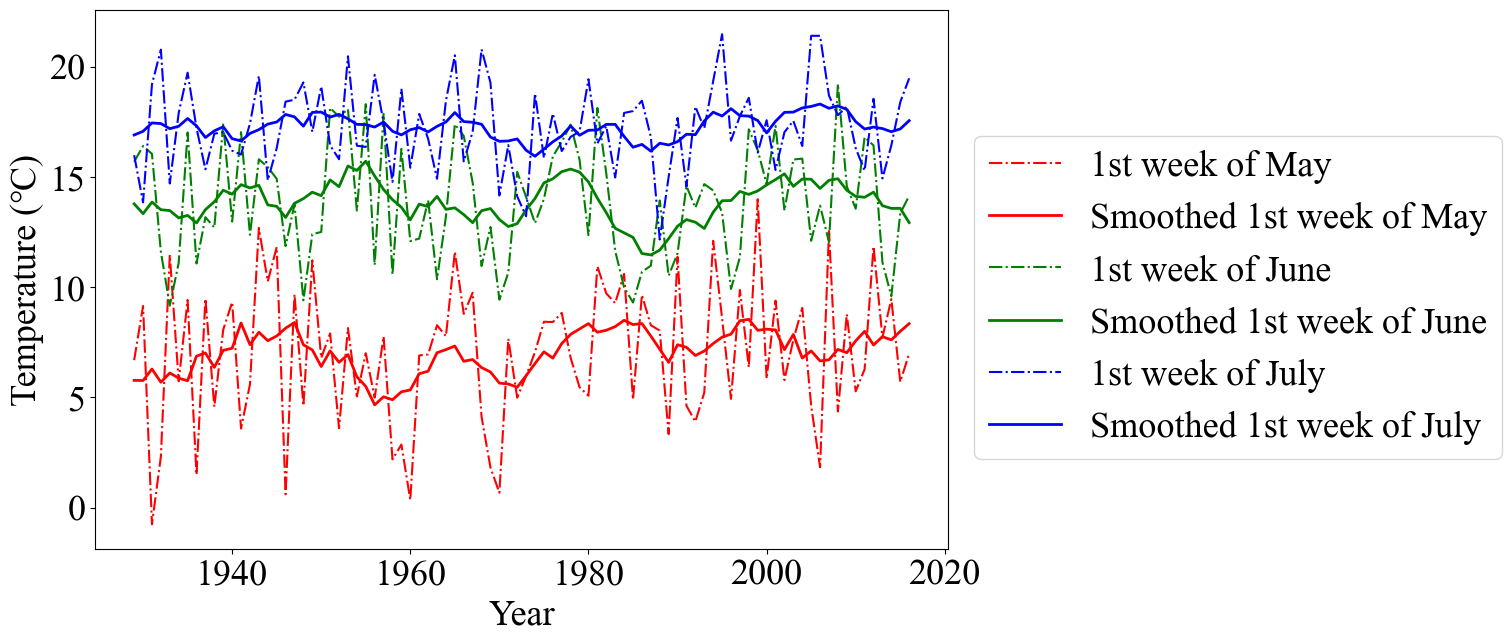

In [184]:
fig, ax = plt.subplots(figsize=(11, 7))

colors = ['red', 'green', 'blue']
labels = ['1st week of May', '1st week of June', '1st week of July']

for i, col in enumerate([(5,4), (6,4), (7,4)]):
    ax.plot(climate.index, climate[col].values, c=colors[i], linestyle='-.', label=labels[i])
    ax.plot(climate.index, climate[col].rolling(9,1,True).mean().values, c=colors[i], lw='2', label=f'Smoothed {labels[i]}')

ax.legend(bbox_to_anchor=(1.01, .8))
ax.set(ylabel='Temperature (℃)', xlabel='Year')

In [2]:
raw_norm_trs = tr.normalize(15)

In [10]:
trees = set(raw_norm_trs['Tree'])

In [63]:
year = 1950
dmeans = []
cwtmeans = []
for tree in trees:
    df = raw_norm_trs.groupby(['Tree', 'Year']).get_group((tree, year))
    dmeans.append(list(df['Dmean']))
    cwtmeans.append(list(df['CWTmean']))

dmeans = np.array(dmeans)
cwtmeans = np.array(cwtmeans)

In [64]:
pca = PCA().fit(np.concatenate([dmeans, cwtmeans], axis=1).T)

Text(0, 0.5, 'Cumulative variance')

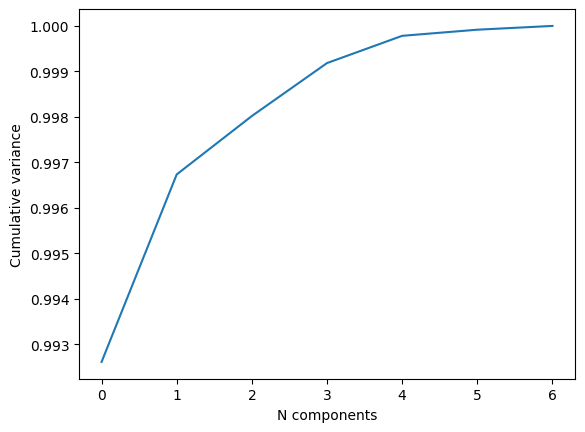

In [65]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('N components')
plt.ylabel('Cumulative variance')

In [4]:
df = pd.read_csv('../../data/processed/climate/climate_tashtyp.csv')

df = df[['Day', 'Month', 'Year', 'Precipitation', 'Temperature']]

In [3]:
df.dropna().to_excel('../reports/tashtyp.xlsx', index=False)
df = pd.read_csv('../../data/processed/climate/climate_minusinsk.csv')
df = df[['Day', 'Month', 'Year', 'Precipitation', 'Temperature']]

In [5]:
df.fillna(-9999).to_excel('../reports/minusinsk.xlsx', index=False)

In [39]:
from zhutils.dataframes import DailyDataFrame

ddf = DailyDataFrame.from_csv('../../data/processed/climate/climate_tashtyp.csv')
plt.rcParams['font.size'] = '20'

def plot_total(
            self,
            temp_ylim = [-25, 25],
            prec_ylim = [0, 70],
            title: str = '',
            temperature_label: str = 'T, °C',
            precipitation_label: str = 'P, mm'
        ) -> tuple:
    r"""
    Plots mean monthly teperatures and total precipitatioins for all years
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=300, figsize=(6, 6))
    plt.subplots_adjust(top=0.95, bottom=.1, right=.89, left=.11)
    
    ax.yaxis.set_label_coords(-.08, .5)
    ax2 = ax.twinx()
    ax.set_zorder(1)  # default zorder is 0 for ax1 and ax2
    ax.patch.set_visible(False)  # prevents ax1 from hiding ax2
    ax2.patch.set_visible(True)
    mean_prec = []
    mean_temp = []

    for i in range(1, 13):
        month_df = self[self['Month'] == i]
        mean_prec.append(month_df.groupby('Year').sum()['Precipitation'].mean())
        mean_temp.append(month_df.groupby('Year').mean()['Temperature'].mean())
    
    ax.axhline(0, c='grey')
    ax.plot(mean_temp, c='red', linewidth=5)
    ax2.bar(range(12), mean_prec, color='blue', width=0.9)
    ax.set_xticks(range(12))
    ax.set_xticklabels(['J', 'F', 'M', 'A', 'M ', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    ax.set_ylabel(temperature_label)

    ax2.set_ylabel(precipitation_label)
    ax.set_ylim(temp_ylim)
    ax2.set_ylim(prec_ylim)
    ax.set_xlabel('Month')

    ax.set_title(title)
    
    return fig, ax

(<Figure size 1800x1800 with 2 Axes>,
 <AxesSubplot: xlabel='Month', ylabel='T, °C'>)

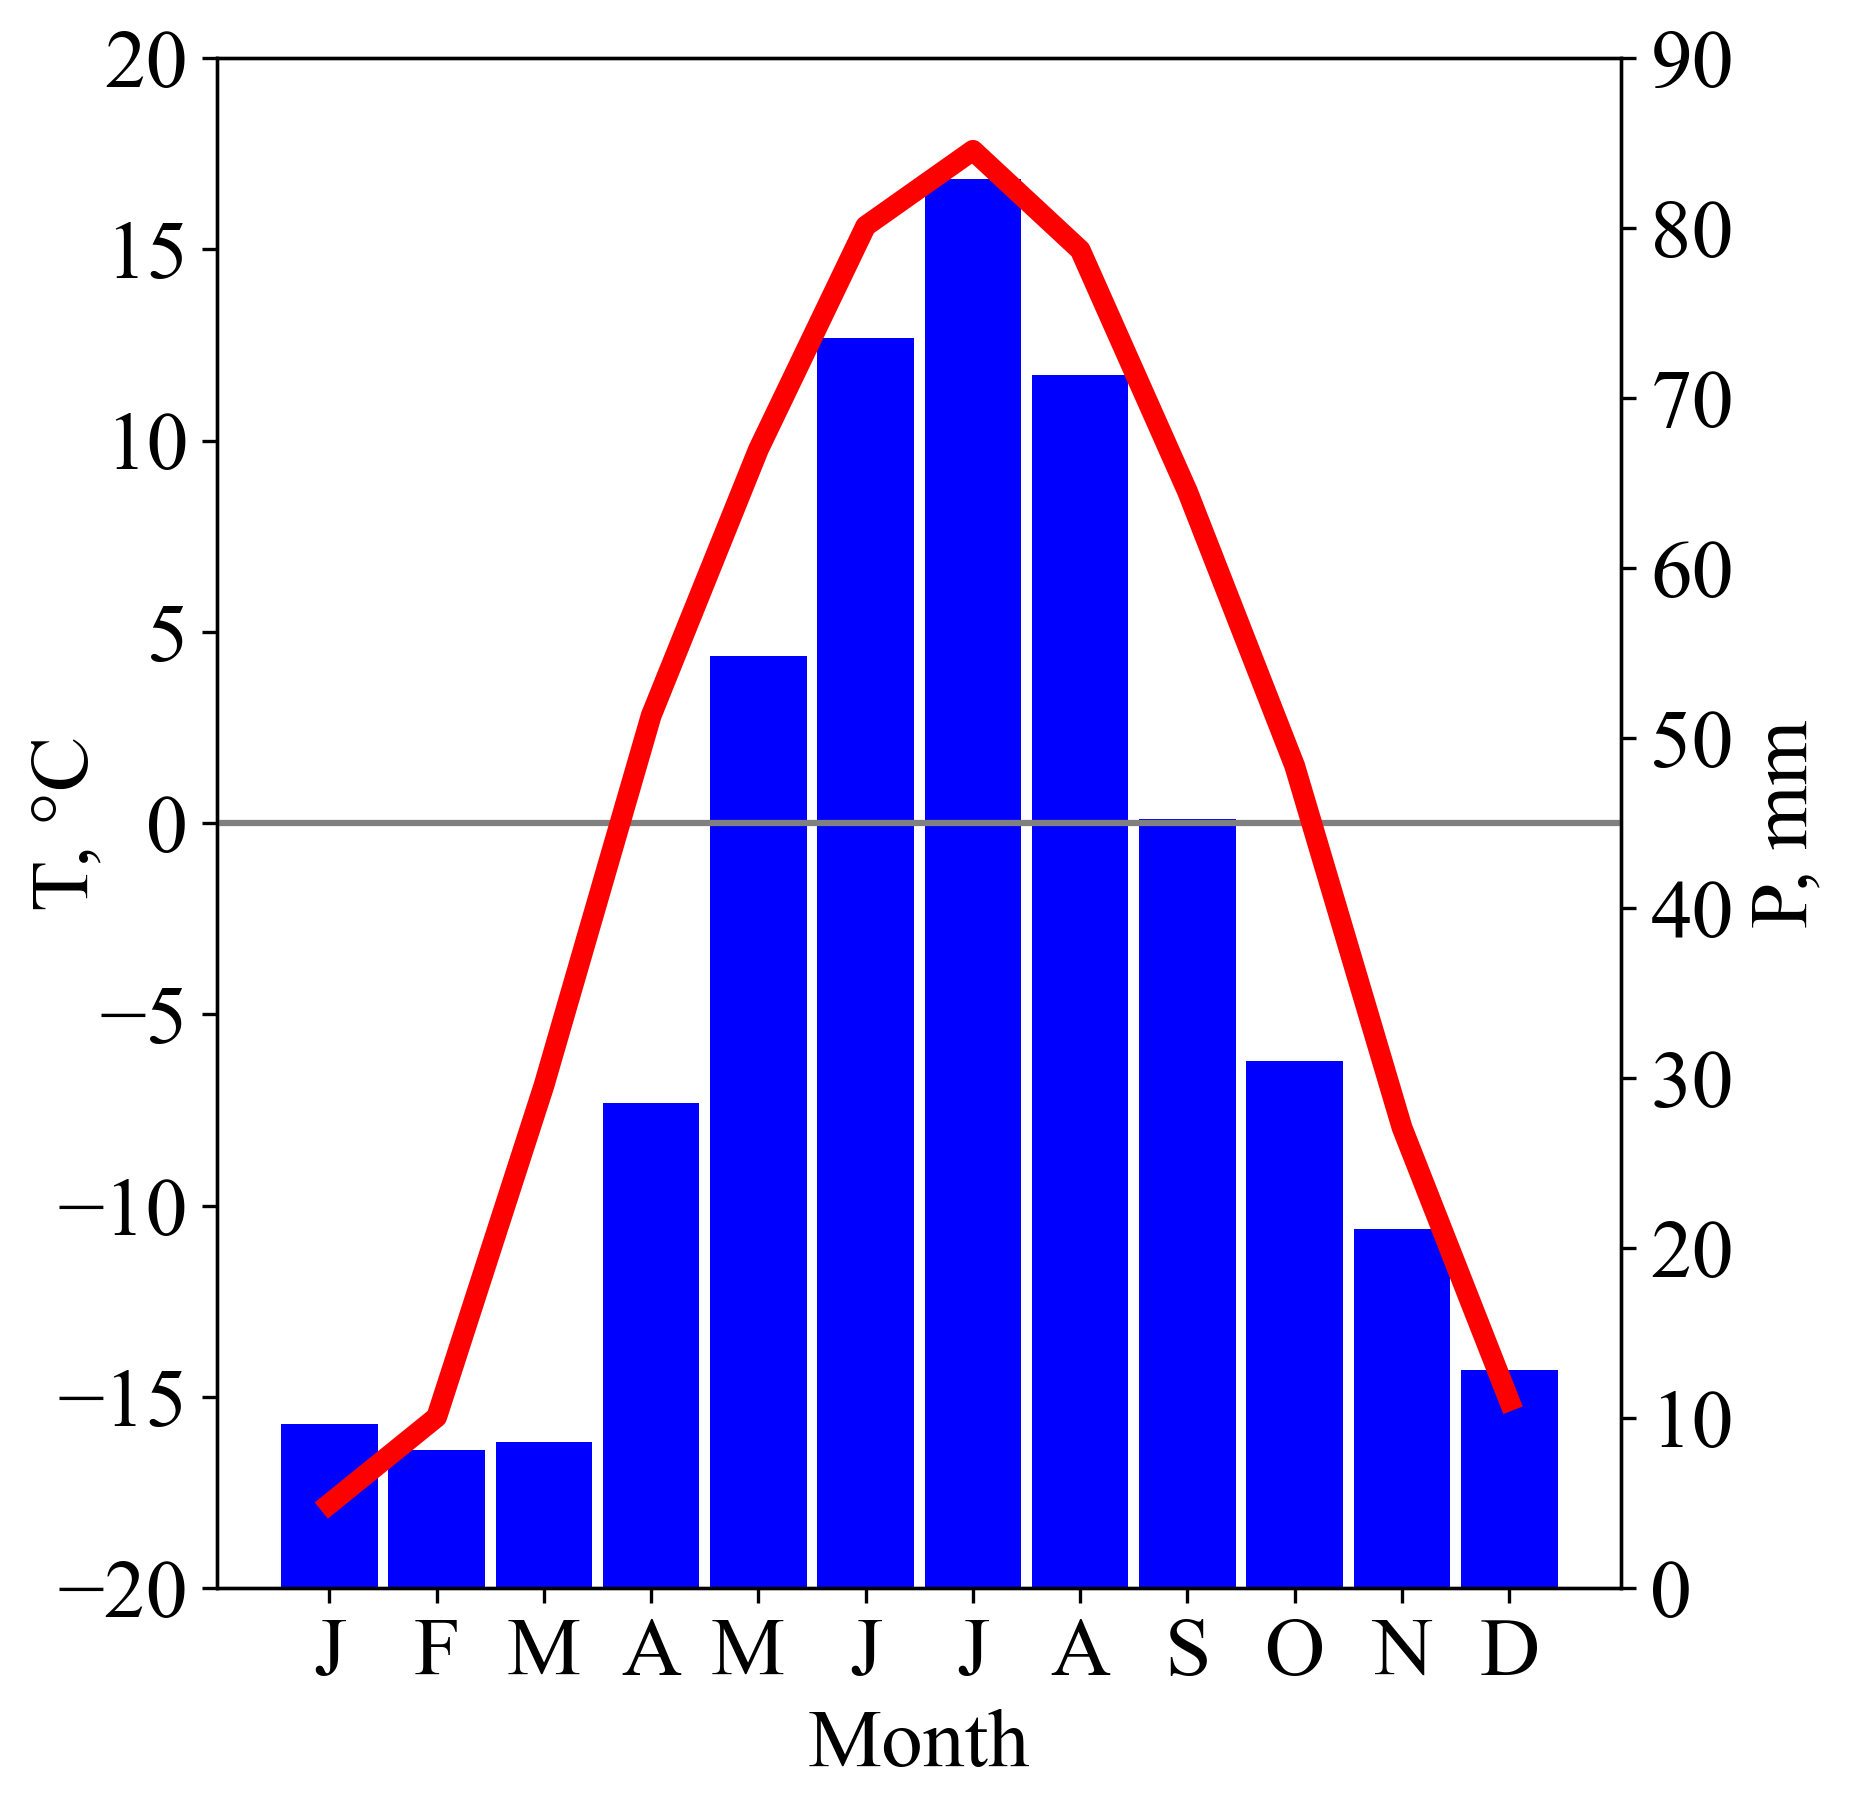

In [40]:
plot_total(ddf, prec_ylim=[0,90], temp_ylim=[-20, 20])